<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="300" alt="Skills Network Logo">
    </a>
</p>


# **Hands-on lab: Exploratory Data Analysis - Laptops Pricing dataset**

Estimated time needed: **45** minutes

In this lab, you will use the skills acquired throughout the module, to explore the effect of different features on the price of laptops. 


# Objectives

After completing this lab you will be able to:

 - Visualize individual feature patterns
 - Run descriptive statistical analysis on the dataset
 - Use groups and pivot tables to find the effect of categorical variables on price
 - Use Pearson Correlation to measure the interdependence between variables


# Setup


For this lab, we will be using the following libraries:

* `skillsnetwork` for downloading the data
*   [`pandas`](https://pandas.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for managing the data.
*   [`numpy`](https://numpy.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for mathematical operations.
*   [`scipy`](https://docs.scipy.org/doc/scipy/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for statistical operations.
*   [`seaborn`](https://seaborn.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for visualizing the data.
*   [`matplotlib`](https://matplotlib.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for additional plotting tools.


# Install Required Libraries

You can install the required libraries by simply running the `pip install` command with a `%` sign before it. For this environment, `seaborn` library requires installation.


### Importing Required Libraries

_We recommend you import all required libraries in one place (here):_


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

# Import the dataset

You should download the modified version of the data set from the last module. 
Run the following code block to download the CSV file to this environment.


In [5]:
filepath="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/laptop_pricing_dataset_mod2.csv"
df=pd.read_csv(filepath)
df.head()
df.dtypes

Unnamed: 0.1          int64
Unnamed: 0            int64
Manufacturer         object
Category              int64
GPU                   int64
OS                    int64
CPU_core              int64
Screen_Size_inch    float64
CPU_frequency       float64
RAM_GB                int64
Storage_GB_SSD        int64
Weight_pounds       float64
Price                 int64
Price-binned         object
Screen-Full_HD        int64
Screen-IPS_panel      int64
dtype: object

Import the file to a pandas dataframe.


# Task 1 - Visualize individual feature patterns

### Continuous valued features
Generate regression plots for each of the parameters "CPU_frequency", "Screen_Size_inch" and "Weight_pounds" against "Price". Also, print the value of correlation of each feature with "Price".


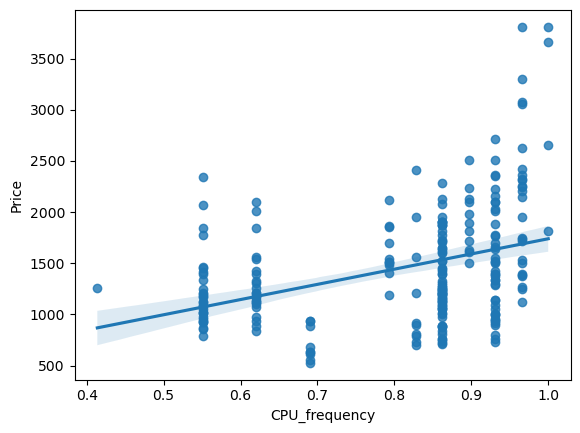

The value of correlation between CPU_frequency and Price is 0.36666555892588604


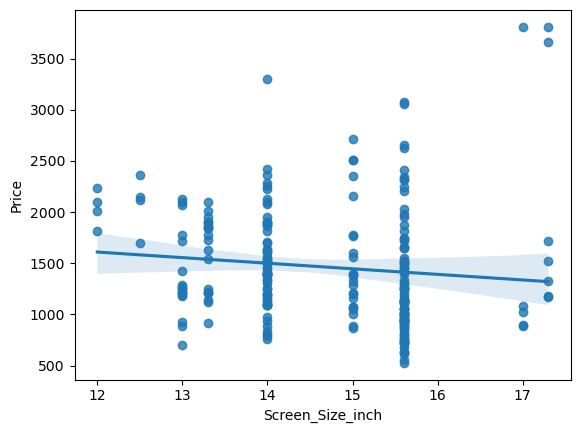

The value of correlation between Screen_Size_inch and Price is -0.11064420817118269


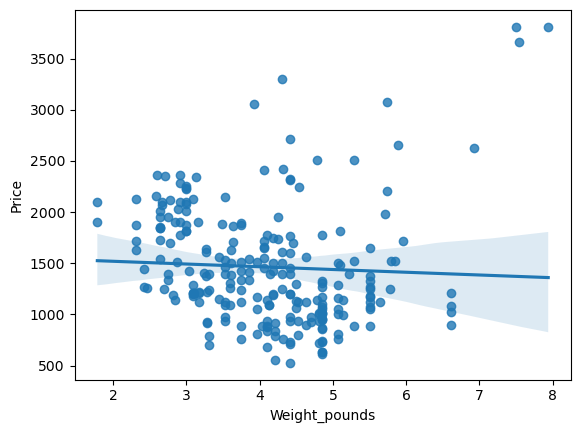

The value of correlation between Weight_pounds and Price is -0.05031225837751549


In [7]:
# Write your code below and press Shift+Enter to execute
# CPU_frequency plot
independent_params=['CPU_frequency','Screen_Size_inch','Weight_pounds']
for item in independent_params:
    sns.regplot(x=df[item],y=df['Price'],data=df)
    plt.show()
    pearson_coeff,p_val=stats.pearsonr(df[item],df['Price'])
    print(f"The value of correlation between {item} and Price is {pearson_coeff}")

<details>
    <summary>Click here for Solution</summary>

```python
sns.regplot(x="CPU_frequency", y="Price", data=df)
plt.ylim(0,)
```

</details>


Interpretation: "CPU_frequency" has a 36% positive correlation with the price of the laptops. The other two parameters have weak correlation with price.


### Categorical features
Generate Box plots for the different feature that hold categorical values. These features would be "Category", "GPU", "OS", "CPU_core", "RAM_GB", "Storage_GB_SSD"


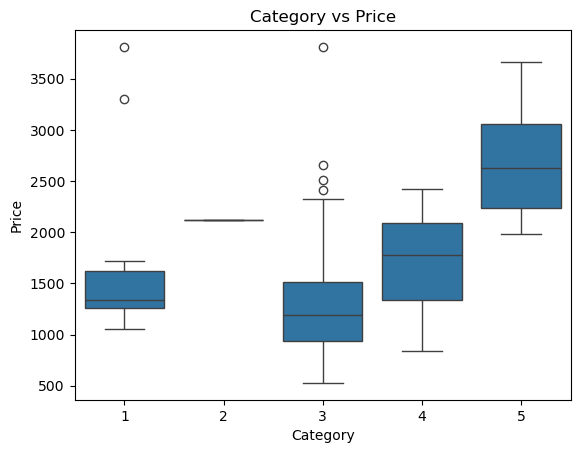

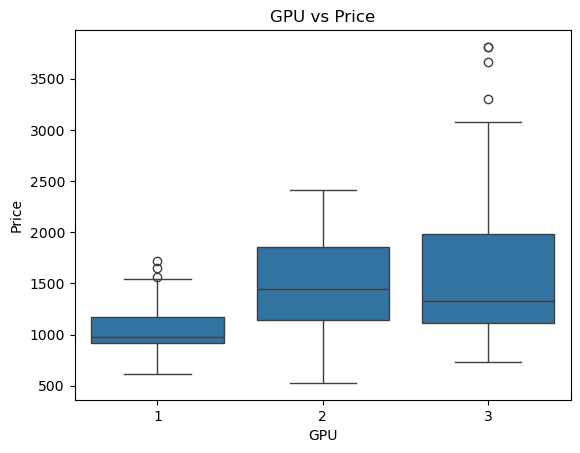

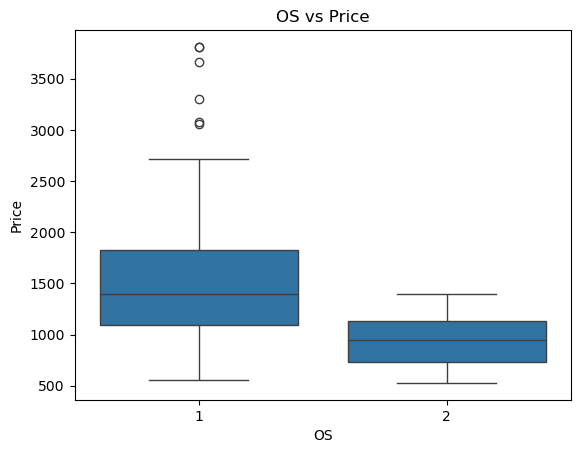

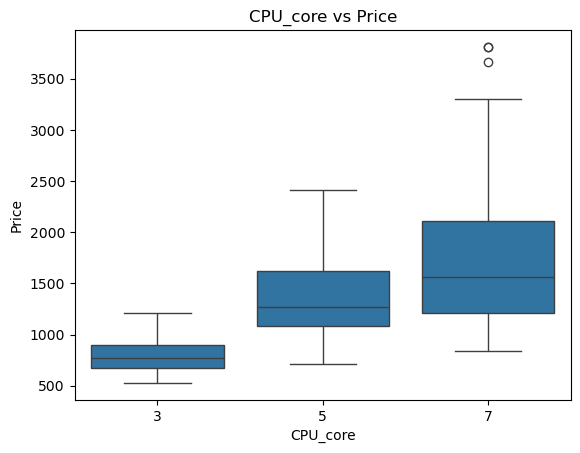

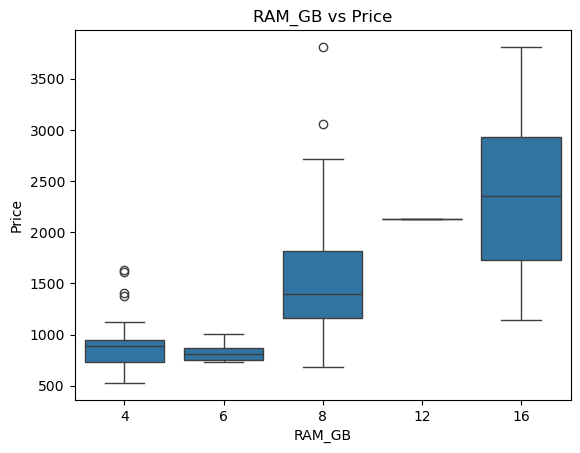

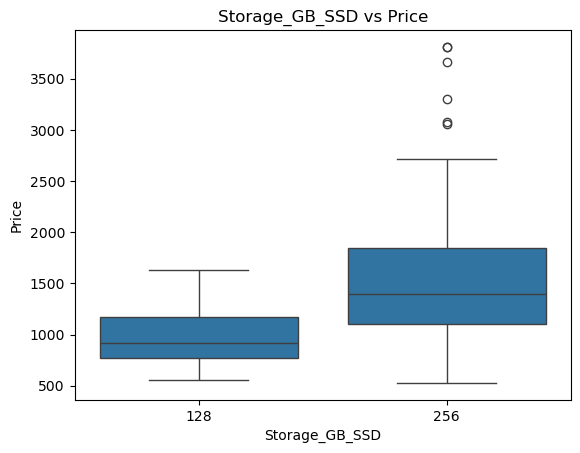

In [8]:
# Write your code below and press Shift+Enter to execute
# Category Box plot
categories=["Category", "GPU", "OS", "CPU_core", "RAM_GB", "Storage_GB_SSD"]
for item in categories:
    sns.boxplot(x=df[item],y=df["Price"],data=df)
    plt.title(f"{item} vs Price")
    plt.show()

<details>
    <summary>Click here for Solution</summary>
    
```python
sns.boxplot(x="Category", y="Price", data=df)
```

</details>


# Task 2 - Descriptive Statistical Analysis


Generate the statistical description of all the features being used in the data set. Include "object" data types as well.


In [9]:
# Write your code below and press Shift+Enter to execute
df.describe(include=['object'])

,Manufacturer,Price-binned
count,238,238
unique,11,3
top,Dell,Low
freq,71,160


<details>
<summary>Click here for Solution</summary>

```python
print(df.describe())
print(df.describe(include=['object']))
```

</details>


# Task 3 - GroupBy and Pivot Tables

Group the parameters "GPU", "CPU_core" and "Price" to make a pivot table and visualize this connection using the pcolor plot.


In [10]:
# Write your code below and press Shift+Enter to execute
# Create the group
init_df = df[['GPU','CPU_core','Price']]
df_group=init_df.groupby(['GPU','CPU_core'],as_index=False).mean()
df_group

,GPU,CPU_core,Price
0,1,3,769.250000
1,1,5,998.500000
2,1,7,1167.941176
3,2,3,785.076923
4,2,5,1462.197674
5,2,7,1744.621622
6,3,3,784.000000
7,3,5,1220.680000
8,3,7,1945.097561


<details>
<summary>Click here for Solution</summary>

```python
df_gptest = df[['GPU','CPU_core','Price']]
grouped_test1 = df_gptest.groupby(['GPU','CPU_core'],as_index=False).mean()
print(grouped_test1)
```

</details>


In [11]:
# Write your code below and press Shift+Enter to execute
# Create the Pivot table
pivot_tbl=df_group.pivot(index="GPU",columns="CPU_core")
pivot_tbl

Price                          
CPU_core           3            5            7
GPU                                           
1         769.250000   998.500000  1167.941176
2         785.076923  1462.197674  1744.621622
3         784.000000  1220.680000  1945.097561

<details>
<summary>Click here for Solution</summary>

```python
grouped_pivot = grouped_test1.pivot(index='GPU',columns='CPU_core')
print(grouped_pivot)
```

</details>


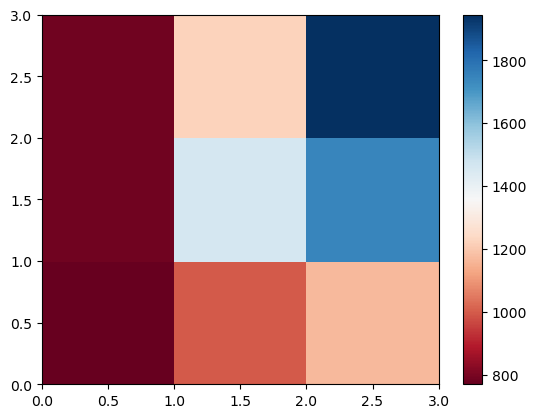

In [12]:
# Write your code below and press Shift+Enter to execute
# Create the Plot
plt.pcolor(pivot_tbl,cmap="RdBu")
plt.colorbar()
plt.show()

<details>
<summary>Click here for Solution</summary>

```python
fig, ax = plt.subplots()
im = ax.pcolor(grouped_pivot, cmap='RdBu')

#label names
row_labels = grouped_pivot.columns.levels[1]
col_labels = grouped_pivot.index

#move ticks and labels to the center
ax.set_xticks(np.arange(grouped_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

fig.colorbar(im)
```

</details>


# Task 4 - Pearson Correlation and p-values

Use the `scipy.stats.pearsonr()` function to evaluate the Pearson Coefficient and the p-values for each parameter tested above. This will help you determine the parameters most likely to have a strong effect on the price of the laptops.


In [13]:
# Write your code below and press Shift+Enter to execute
predictors=["CPU_frequency","Screen_Size_inch","Weight_pounds","Category", "GPU", "OS", "CPU_core", "RAM_GB", "Storage_GB_SSD"]
for item in predictors:
    pearson_coeff,p_val=stats.pearsonr(df[item],df['Price'])
    print(f"For {item}: \n")
    print(f"The Pearson coefficient is {pearson_coeff} with a p-value of {p_val}.\n")

For CPU_frequency: 

The Pearson coefficient is 0.36666555892588604 with a p-value of 5.5024633507134225e-09.

For Screen_Size_inch: 

The Pearson coefficient is -0.11064420817118269 with a p-value of 0.08853397846830759.

For Weight_pounds: 

The Pearson coefficient is -0.05031225837751549 with a p-value of 0.4397693853433899.

For Category: 

The Pearson coefficient is 0.2862427558126413 with a p-value of 7.225696235806733e-06.

For GPU: 

The Pearson coefficient is 0.2882981988881428 with a p-value of 6.166949698364282e-06.

For OS: 

The Pearson coefficient is -0.2217298011482738 with a p-value of 0.0005696642559246759.

For CPU_core: 

The Pearson coefficient is 0.45939777733551157 with a p-value of 7.912950127009034e-14.

For RAM_GB: 

The Pearson coefficient is 0.5492972971857841 with a p-value of 3.6815606288429613e-20.

For Storage_GB_SSD: 

The Pearson coefficient is 0.2434207552181029 with a p-value of 0.00014898923191724174.



<details>
<summary>Click here for Solution</summary>

```python
for param in ['RAM_GB','CPU_frequency','Storage_GB_SSD','Screen_Size_inch','Weight_pounds','CPU_core','OS','GPU','Category']:
    pearson_coef, p_value = stats.pearsonr(df[param], df['Price'])
    print(param)
    print("The Pearson Correlation Coefficient for ",param," is", pearson_coef, " with a P-value of P =", p_value)
```

</details>


# Congratulations! You have completed the lab


## Authors


[Abhishek Gagneja](https://www.coursera.org/instructor/~129186572)

[Vicky Kuo](https://author.skills.network/instructors/vicky_kuo)


## Change Log


|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2023-09-15|0.1|Abhishek Gagneja|Initial Version Created|
|2023-09-18|0.2|Vicky Kuo|Reviewed and Revised|


Copyright © 2023 IBM Corporation. All rights reserved.
